<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/2023kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


강의 교재 : https://wikibook.co.kr/pymlrev2/

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris()
data = iris.data
label = iris.target

In [4]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(scaled_data,label)
print(scaled_data.shape,"->",lda_data.shape)

(150, 4) -> (150, 2)


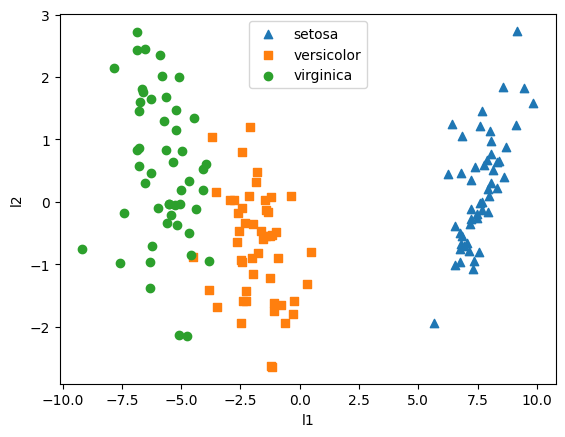

In [7]:
df = pd.DataFrame(lda_data,columns=['l1','l2'])
df['label']=label
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
  f_i = df['label']==i #품종별로 필터링
  df_i = df[f_i] #특정 품종만 추출
  x_data = df_i['l1'] #p1컬럼 을 x 데이터로 설정
  y_data = df_i['l2'] #p2 컬럼을 y 데이터로 설정
  plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('l1')
plt.ylabel('l2')
plt.legend()
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [9]:
rfc = RandomForestClassifier()
s = cross_val_score(rfc,lda_data,label,scoring='accuracy',cv=5)
print("정확도:",s)
print("평균:",s.mean())

정확도: [1.         1.         0.9        0.93333333 1.        ]
평균: 0.9666666666666666
